In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from gallery_probes_generator import GalleryProbesGenerator

In [2]:
data_generator = GalleryProbesGenerator(path_to_dataset='data/dataset1/', probes_length=200)

# probe_registered_names, probe_registered_pictures = data_generator.get_registered_probes()
# probe_unregistered_names, probe_unregistered_pictures = data_generator.get_unregistered_probes()
gallery_names, gallery_pictures = data_generator.get_gallery()

(5353, 22500)
(5353, 22500)


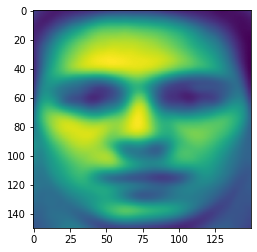

In [3]:
linear_pictures = np.array([picture.flatten() for person in gallery_pictures for picture in person])
print(linear_pictures.shape)

meanPoint = linear_pictures.mean(axis = 0)

# subtract mean point
linear_pictures_centered = linear_pictures - meanPoint
print(linear_pictures_centered.shape)

mean_face = plt.imshow(np.reshape(meanPoint, (-1, 150)))

In [4]:
if os.path.exists('data/dataset1/eigenface_npy/val_propres.npy') and os.path.exists('data/dataset1/eigenface_npy/vect_propres.npy') and os.path.exists('data/dataset1/eigenface_npy/w.npy'):
    val_propres = np.load('data/dataset1/eigenface_npy/val_propres.npy', allow_pickle=True)
    vect_propres = np.load('data/dataset1/eigenface_npy/vect_propres.npy', allow_pickle=True)
    w = np.load('data/dataset1/eigenface_npy/w.npy', allow_pickle=True)

else:
    print('cov_d_transpose')
    cov_d_transpose = (1/linear_pictures_centered.shape[1]-1) * np.dot(linear_pictures_centered, np.transpose(linear_pictures_centered))
    print(cov_d_transpose.shape)

    print('val et vec propre')
    val_propres, vect_propres = np.linalg.eig(cov_d_transpose)

    def normalize(v):
           norm = np.linalg.norm(v)
           if norm == 0:
              return v
           return v / norm

    print('calcul des wi')
    w = list()
    for vect in vect_propres:
        w.append(normalize(np.dot(np.transpose(linear_pictures_centered), vect)))

    w = np.array(w)
    print("save offline des tableaux")
    np.save('data/dataset1/eigenface_npy/val_propres.npy', val_propres)
    np.save('data/dataset1/eigenface_npy/vect_propres.npy', vect_propres)
    np.save('data/dataset1/eigenface_npy/w.npy', w)
